In [1]:
import numpy as np
import sys

import gudhi as gd
import gudhi.representations

import pandas as pd

sys.path.append('../')
from tools import plot_tools as myplt

import matplotlib.pyplot as plt

## Utility functions

In [9]:
def get_skeleton(data,max_edge_length):
    return gd.RipsComplex(points = data,
                          max_edge_length = max_edge_length)

def get_VRcomplex(skeleton,max_dim):
    return skeleton.create_simplex_tree(max_dimension = max_dim)

def get_barCode(VRcomplex):
    return VRcomplex.persistence()

## Simple PCD

In [2]:
path_file = '../datasets/samplePCD/'

files_list = [
    'data_00.txt', 
    'data_01.txt', 
    'data_02.txt', 
    'data_03.txt', 
    'data_04.txt'
]

dataSet = {
    'data_'+str(i): np.loadtxt(path_file+file, skiprows=1) for i,file in enumerate(files_list)
}

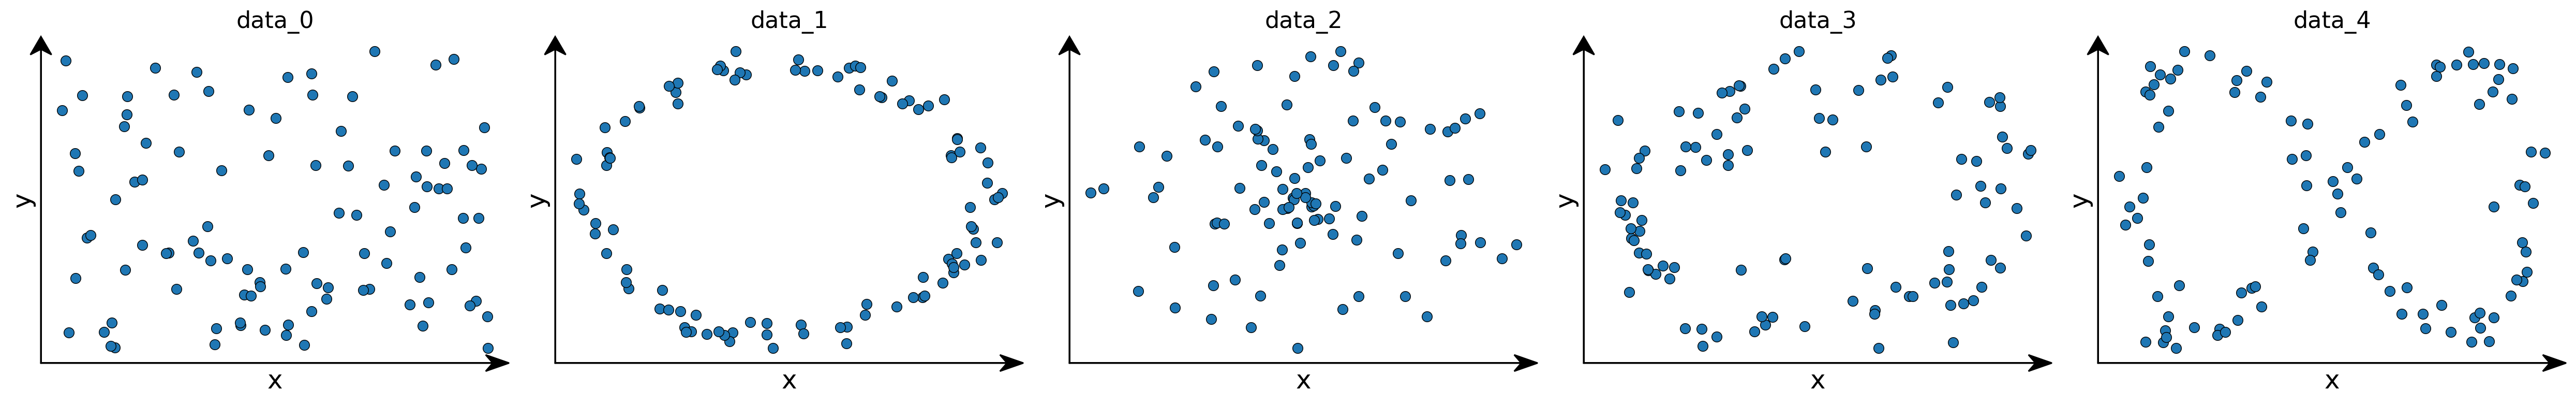

In [29]:
fig, ax = myplt.get_axes(len(files_list), max_col=5, res=200)
for i,j in enumerate(dataSet):
    myplt.single_scatter_axe(dataSet[j], ax[i], s=50)
    myplt.axarrows(fig,ax[i],labels=['x','y'])
    ax[i].set_title(r''+j, size=16)
fig.tight_layout()

In [10]:
MEL = 1.0
skeletons = {
    'sk_'+str(i): get_skeleton(dataSet[dset],MEL) for i,dset in enumerate(dataSet)
}

In [13]:
MAX_DIM = 2
VRcomplexes = {
    'VR_'+str(i): get_VRcomplex(skeletons[sk],MAX_DIM) for i,sk in enumerate(skeletons)
}

In [14]:
barCodes = {
    'brcd_'+str(i): get_barCode(VRcomplexes[vr]) for i,vr in enumerate(VRcomplexes)
}

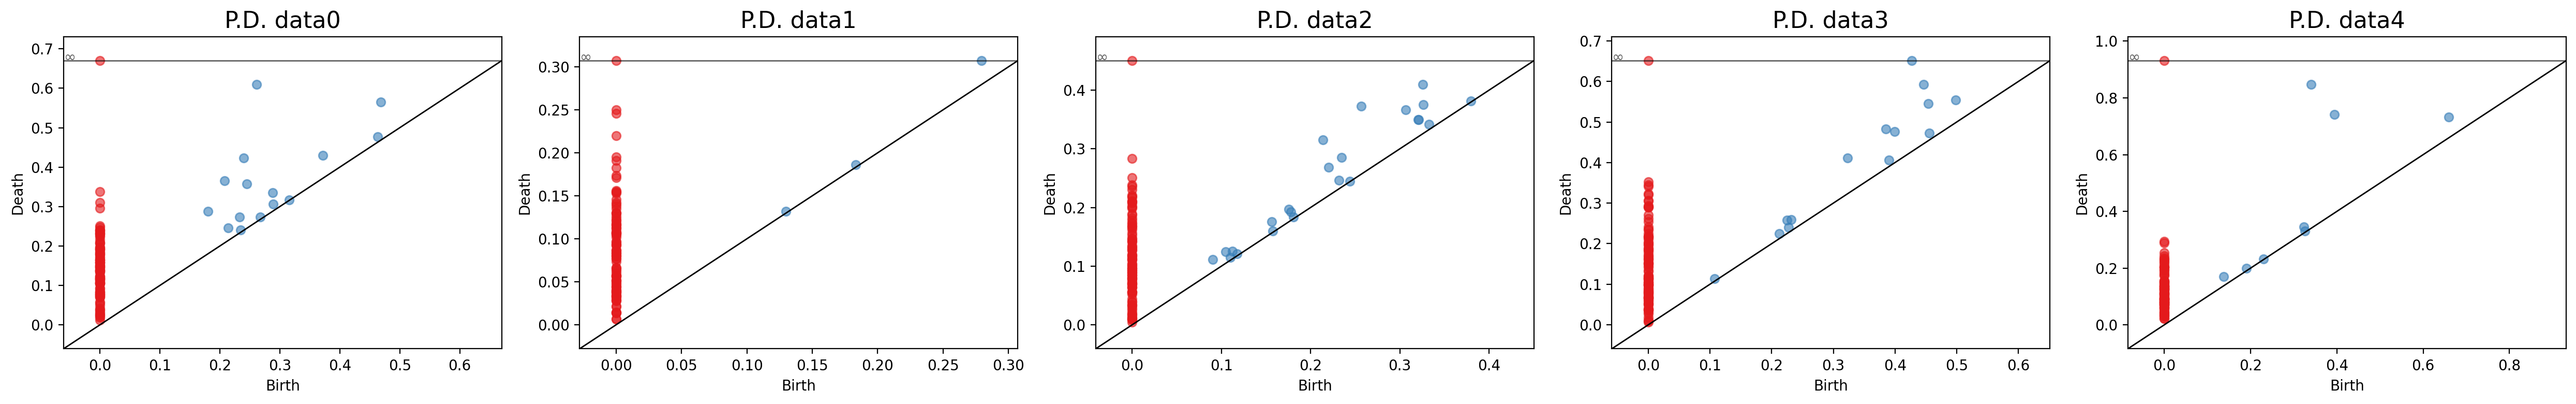

In [30]:
fig, ax = myplt.get_axes(len(files_list), max_col=5, res=200)
for i,j in enumerate(barCodes):
    gd.plot_persistence_diagram(barCodes[j], axes=ax[i])
    ax[i].set_title(r'P.D. data'+str(i), size=16)
#     ax[i].set_xlabel(r'Birth', size=16)
#     ax[i].set_ylabel(r'Death', size=16)
fig.tight_layout()

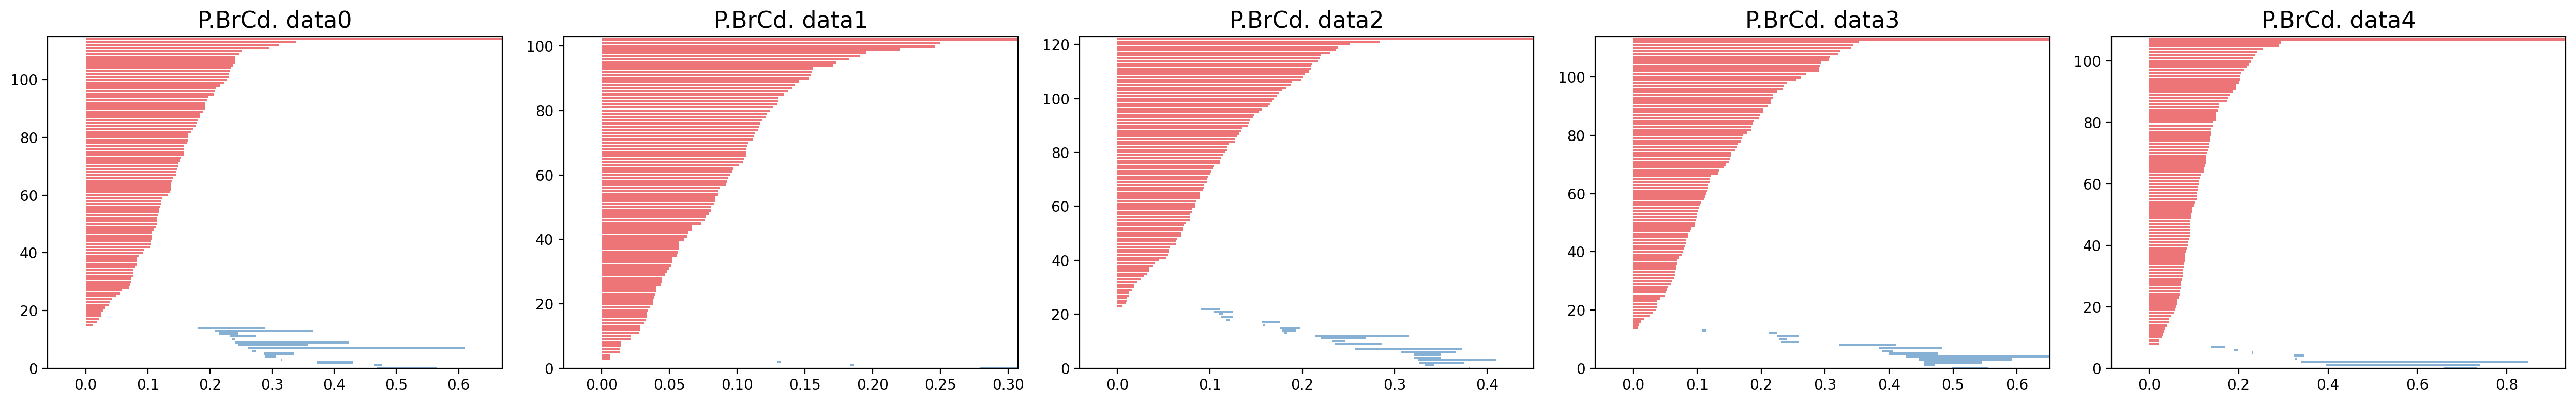

In [33]:
fig, ax = myplt.get_axes(len(files_list), max_col=5, res=200)
for i,j in enumerate(barCodes):
    gd.plot_persistence_barcode(barCodes[j], axes=ax[i])
    ax[i].set_title(r'P.BrCd. data'+str(i), size=16)
#     ax[i].set_xlabel(r'Birth', size=16)
#     ax[i].set_ylabel(r'Death', size=16)
fig.tight_layout()

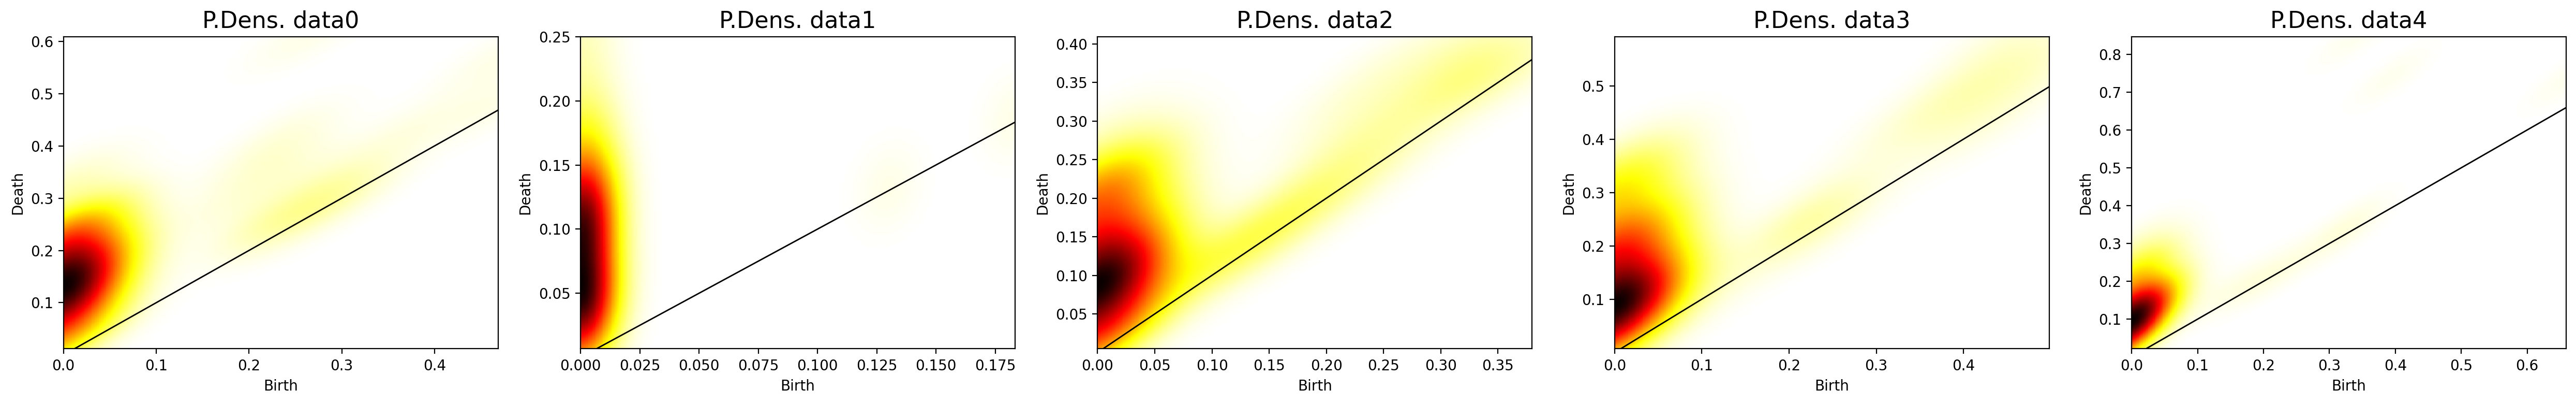

In [35]:
fig, ax = myplt.get_axes(len(files_list), max_col=5, res=200)
for i,j in enumerate(barCodes):
    gd.plot_persistence_density(barCodes[j], axes=ax[i])
    ax[i].set_title(r'P.Dens. data'+str(i), size=16)
#     ax[i].set_xlabel(r'Birth', size=16)
#     ax[i].set_ylabel(r'Death', size=16)
fig.tight_layout()

In [ ]:
dataSet_list[0].plot.scatter(x=0,y=1)

In [ ]:
# skeleton complex calculation
skeleton = gd.RipsComplex(points = dataSet_list[0].values,
                             max_edge_length = 1)

# VR complex filtration calculation
VR_complex = skeleton.create_simplex_tree(max_dimension = 2)

# persistence calculation
barCode_rips = VR_complex.persistence()

In [ ]:
gd.plot_persistence_diagram(barCode_rips)

In [ ]:
VR_complex.get_filtration()

In [ ]:
VR_complex.get_filtration()[100][0]

In [ ]:
filtration_edges = list()
for i in VR_complex.get_filtration():
    if i[1] != 0.0 and i[1] <= 0.3:
        filtration_edges.append(i[0])
        
filtration_tuple = [tuple(i) for i in filtration_edges]

In [ ]:
# filtration_tuple

In [ ]:
import networkx as nx
import itertools

In [ ]:
G = nx.Graph()

In [ ]:
G.add_nodes_from(np.arange(100))
G.nodes

In [ ]:
# for i,edge in enumerate(filtration_tuple):
#     print(i, edge)
#     G.add_edges_from([edge])
# G.edges

In [ ]:
for node_tuple in filtration_tuple:
#     G.add_edges_from(itertools.product(node_tuple, node_tuple))
    G.add_edges_from(itertools.combinations_with_replacement(node_tuple, 2))

In [ ]:
nx.draw(G, pos=dataSet_list[0].values,
        node_size=100, node_color='tab:red',
        width=3.0, edge_color='tab:blue',
        alpha=1)